## Laptop Data Wrangling

This notebook's purpose will be to load, explore, and understand  the laptop dataset acquired from the following location: https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list? According to the data published, the data was scrapped from flipkart.com.

The ultimate goal of the project is to create a pricing model to predict the value of a laptop based on its features. In this step, we make sure we clean, organize, and make the dataset friendly to analysis. We want to look at some of the features which greatly impact laptop prices and how certain features impact laptop pricing. We are interested in using this data to help Lenovo create a model which will predict pricing accurately in an increasingly complex laptop market. 

Part of the dataset comes cleaned but we will still verify its usability and validity

## Importing necessary packages

We will import the necessary packages to create dataframes, perform initial visualizations, and other utilities that we need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import os
import numpy as np
from collections import Counter


## Objectives

We wish to accomplish the following goals with the data:
1. Are there any errors, outliers, and other issues with the data?
2. What are some initial trends that might be interesting to pursue? 
3. What are some potentially useful features?

## Load the Laptop Data

In [2]:
# Loading the data into a dataframe
laptop_data = pd.read_csv('./dataset/Cleaned_Laptop_data.csv')

In [3]:
# Loking at info to see a summary of the data
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

We see there are approximately 896 row of data. While more laptops would be useful this would be a good place to start while we do our initial exploration into the data. To get a better visualization, we'll look at the head of the data frame. The most important information here would be `latest_price`. We notice that the price is given in **INR** which means at some point we will want to convert this to **USD**. We see some columns that could be useful such as `hdd`, `ssd`. Some other features like `display_size` seem to be missing on a lot of models so that may not be as useful.

In [4]:
laptop_data.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [5]:
laptop_data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


## Initial Insights and Missing Data

Lets start digging into our data and see what initial insights we can glean. While we notice that Lenovo is in this dataset, we are looking at our pricing model for new laptops moving forward so we can comfortably leave Lenovo in the data set for now.

We will do the following steps:
1. Look to see if there is any data formatting that may need to be adjusted such as converting certain measurements from strings to integers and making sure we are in the right currency.
2. Visualize some trends and decide which features may be actually useful. We will attempt to drop the features that are not useful.
3. Look at some initial trends compared to price that might be useful.

## Tidying up our data

We want to make sure that the data is formatted as best we can in a way that makes sense for the information. First, we want to make sure we are not doing more work than we need to. We will look at whether there are features with missing information to determine which features we will begin to focus on. 


## Missing Data

Lets look at whether there is any missing data.

In [6]:
#Look at the sum of missing information and what % of the data takes up the total
missing = pd.concat([laptop_data.isnull().sum(), 100 * laptop_data.isnull().mean()], axis=1)

#Relabel the columns to look at the count and %. 
missing.columns = ['count', '%']
missing = missing.sort_values(by = 'count', ascending = False)

missing

,count,%
brand,0,0.0
weight,0,0.0
ratings,0,0.0
star_rating,0,0.0
discount,0,0.0
old_price,0,0.0
latest_price,0,0.0
msoffice,0,0.0
Touchscreen,0,0.0
warranty,0,0.0


In [7]:
laptop_data.ram_gb.value_counts(dropna=False)

8 GB GB     454
4 GB GB     259
16 GB GB    180
32 GB GB      3
Name: ram_gb, dtype: int64

Based on this, we see that there is no missing data! That's great!

Except, we know that under the column for `display_size` that there is a label "Missing" for laptops that do not have their display size data scrapped. We should double check to see if there are columnes that have the word "Missing" instead of a NaN value.

In [8]:
#Collecting the names of each column in the dataframe
laptop_columns = list(laptop_data.columns)

In [9]:
#Calculating the amount of times 'Missing' shows up in each column
missing3 = [sum(laptop_data[column] == 'Missing') for column in laptop_data]

In [10]:
missing3

[0, 95, 0, 0, 239, 0, 0, 0, 0, 0, 0, 0, 0, 332, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
#Combinging the missing count to the column names to understand how many times 'Missing'
#appears in each column

laptop_missing = pd.DataFrame(data = missing3, index = laptop_columns)
laptop_missing

,0
brand,0
model,95
processor_brand,0
processor_name,0
processor_gnrtn,239
ram_gb,0
ram_type,0
ssd,0
hdd,0
os,0


From this we can see that `model`, `processor_gnrtn`, and `display_size` all have missing values. That means these are probably not good features for us to use as part of the regression model. Luckily, given our knowledge of laptops in general, we can say that model name probably is not extremely important for consumers when it comes to price. However, display size and processor generation could be important factors for pricing especially as generations get older.

We may want to find a way to consider this information in our model even though they are missing quite a good chunk or a way to solve this missing data information.

Looking at the columns, I see some information that could be formatted as numbers but instead are formatted as strings.

We will pay close attentiong to the information in `ram_gb`,`ssd`, `hdd`, `os_bit`, `graphic_card_gb` as potential candidates for these as they are all measured in a unit and the data may have been formatted with this unit in the collection.

In [12]:
#Lets look at the head of each of the columns and see what we are working with
laptop_data[['ram_gb','ssd','hdd','os_bit','graphic_card_gb','weight']].head()

,ram_gb,ssd,hdd,os_bit,graphic_card_gb,weight
0,4 GB GB,0 GB,1024 GB,64-bit,0,ThinNlight
1,4 GB GB,0 GB,512 GB,64-bit,0,Casual
2,4 GB GB,128 GB,0 GB,64-bit,0,ThinNlight
3,4 GB GB,128 GB,0 GB,64-bit,0,ThinNlight
4,4 GB GB,256 GB,0 GB,64-bit,0,ThinNlight


In [13]:
#As we can see, it seems that the 'graphic_card_gb' does not contain the units 
#Since 'ram_gb', 'ssd', 'hdd', and 'os-bit' all contain the unit, we should parse this out
#Seinc we want to repeat this, lets make a function and call it a few times
#The function will take the dataframe of choice,
#strip the string of choice and convert it to a int

def unit_strip(df, col, string):
    df[col] = df[col].str.strip(string)
    df[col] = df[col].astype('int')
    
unit_strip(laptop_data, 'ram_gb','GB GB')
unit_strip(laptop_data, 'ssd', 'GB') 
unit_strip(laptop_data, 'hdd', 'GB')
unit_strip(laptop_data,'os_bit','-bit')

In [14]:
#Lets make sure that it worked
laptop_data[['ram_gb','ssd','hdd','os_bit','graphic_card_gb']].head()

,ram_gb,ssd,hdd,os_bit,graphic_card_gb
0,4,0,1024,64,0
1,4,0,512,64,0
2,4,128,0,64,0
3,4,128,0,64,0
4,4,256,0,64,0


In [15]:
#Now, lets rename the columns ssd and hdd so that they show the unit
laptop_data.rename(columns = {'ssd':'ssd_gb','hdd':'hdd_gb'}, inplace = True)
laptop_data.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd_gb', 'hdd_gb', 'os',
       'os_bit', 'graphic_card_gb', 'weight', 'display_size', 'warranty',
       'Touchscreen', 'msoffice', 'latest_price', 'old_price', 'discount',
       'star_rating', 'ratings', 'reviews'],
      dtype='object')

## Dropping some columns
Looking at the columns that we have, it may be useful to drop a few. Based on our domain knowledge we can reasonably expect that `old_price` and `discount` may not be useful for pricing models as we want the most recent price to make the most accurate model. 

We can also drop things like `reviews`, `star_rating` and `ratings` since our new product will not have ratings associated with it yet and we won't be able to use that as a pricing predictor. Removing these columns will make exploration more straightforward.

In [16]:
#Lets remove the columns 'old_price','discount', 'reviews, star_rating', 
#and 'ratings' as we do not need them at the moment

laptop_data.drop(columns = ['old_price', 'discount', 'reviews','star_rating','ratings'], inplace = True)


In [17]:
laptop_data.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd_gb', 'hdd_gb', 'os',
       'os_bit', 'graphic_card_gb', 'weight', 'display_size', 'warranty',
       'Touchscreen', 'msoffice', 'latest_price'],
      dtype='object')

Because so much of the data such as brand, model, and other information is so common (as laptop brands tend to use the same model name but with varying features) we do not have a strong necessity to look for duplicates in the data.

Before we move on, lets change the prices from INR to USD.

Currently 1 INR is equal to 0.013 USD so we will take the latest price and multiply that by 0.013 to get the USD price of the laptops. Since we are only interested in the latest price, we will drop the `old_price` and `discount` columns as well. Additionally, the `reviews` column is for the number of reviews a particular laptop has which is not useful for modeling price. We will be removing that column as well

In [18]:
#Multiply the current value by 0.013 and convert to USD.

laptop_data['latest_price'] = laptop_data['latest_price'] * 0.013


In [19]:
laptop_data['latest_price'].head()

0    324.87
1    254.67
2    259.87
3    279.37
4    324.87
Name: latest_price, dtype: float64

## Visualizing the data and understand how it "looks"
Here, we are going to look at how some of the information is organized and see if there are any features based on these distributions and our domain knowledge that can be removed from the modeling dataset.

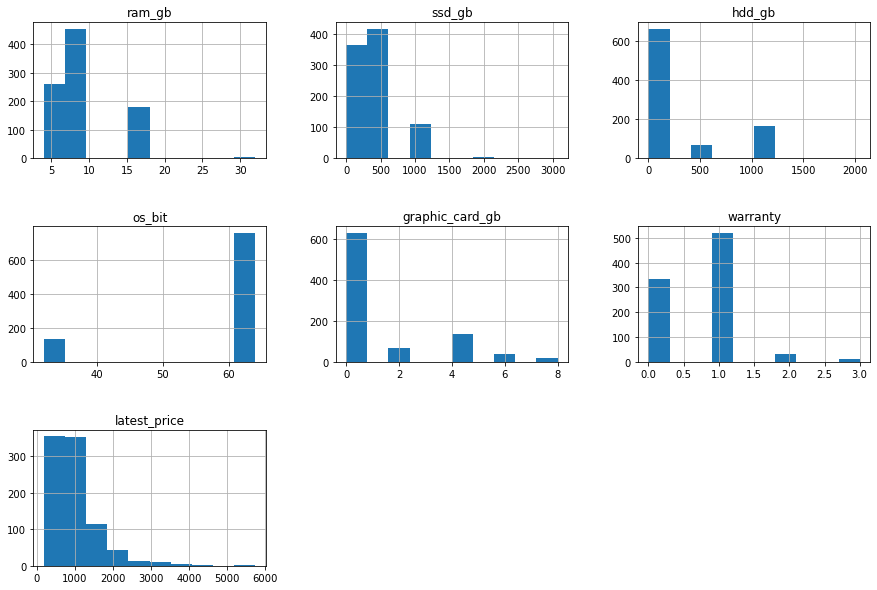

In [20]:
# Lets use histograms to make a quick and dirty visualization of what numerical data
#might be useful for us in the dataset

laptop_data.hist(figsize = (15,10))
plt.subplots_adjust(hspace = 0.5);

Lets try to visualize the string data. By using value_counts we can get counts of how often each string shows up in our data and creating a visualization out of that information. 

Since this is repetitive, lets build a function to do at least part of it!

In [21]:
#We're going to look at the columns 'brand', 'model', 'processor_brand','processor_name','os','weight'
#'Touchscreen', and 'msoffice'
#We're gonna start with building a function that might be able to automate the counting

def count_column(df,col_list):
    count = {}
    for elem in col_list:
        count[elem] = df[elem].value_counts()
    return count

columns_to_count = ['brand','model','processor_brand', 'processor_name','os','weight','Touchscreen','msoffice']
laptop_string_counts = count_column(laptop_data, columns_to_count)

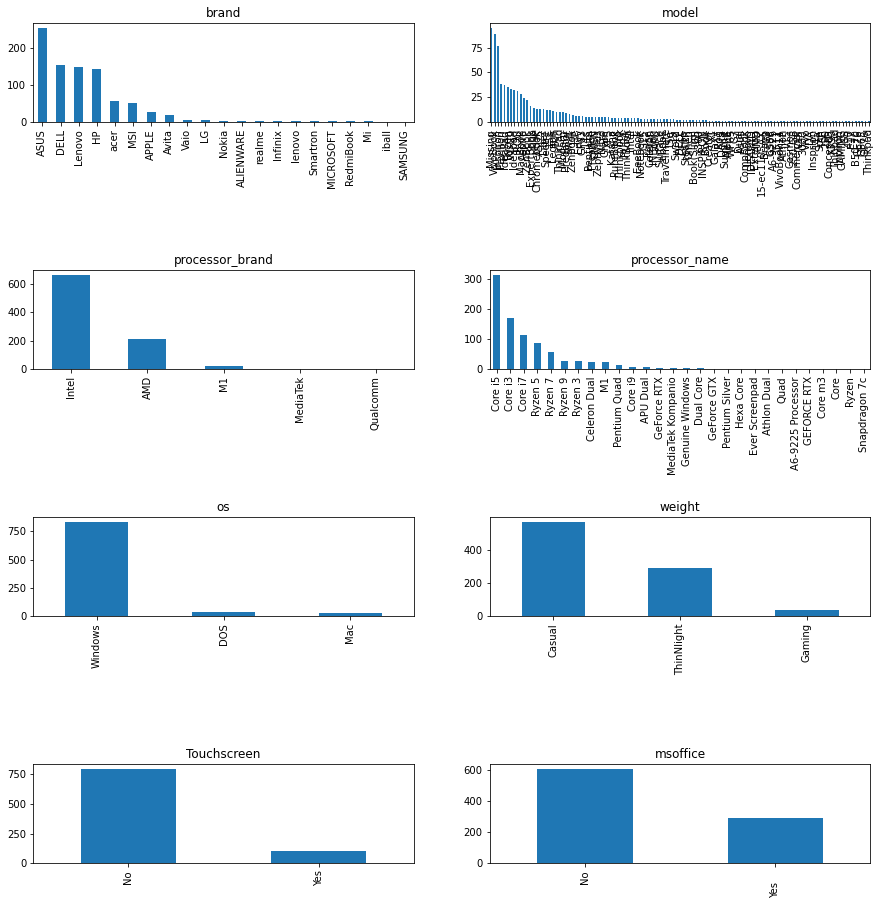

In [22]:
#Now we can plot the string counts out!

plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace = 1.5)

    
for n, key in enumerate(laptop_string_counts):
    ax = plt.subplot(5,2,n+1)
    laptop_string_counts[key].plot(kind = 'bar', ax = ax, title = key)
    
for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(15);

That second chart is a bit unreadable so lets isolate it and visualize it. It looks like the laptop brand chart

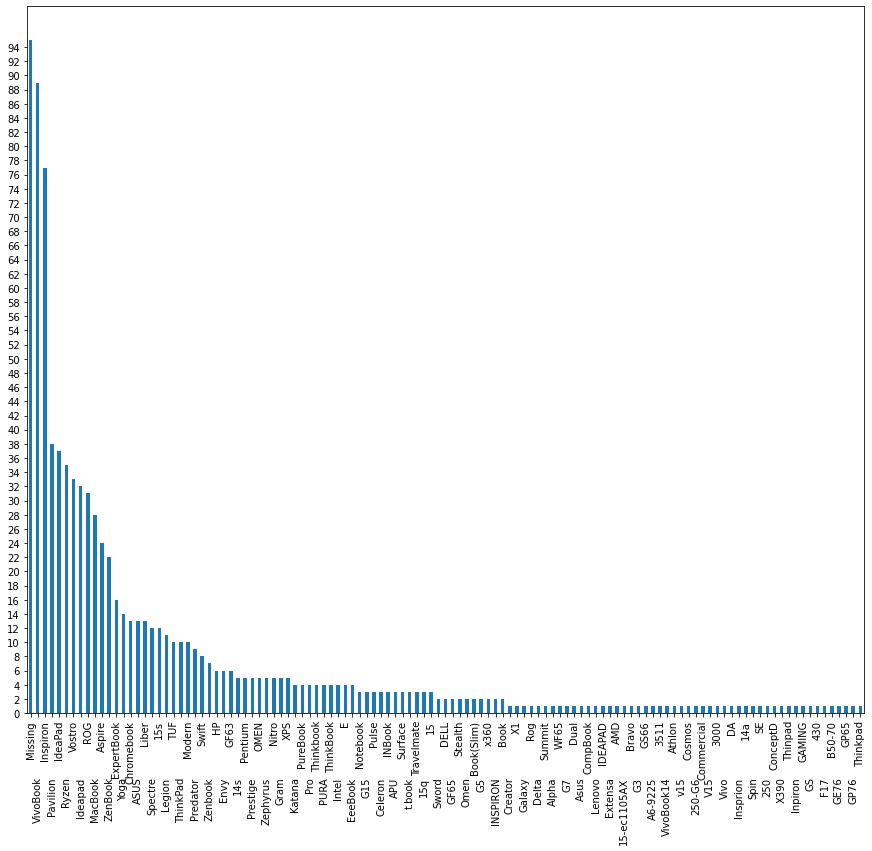

In [23]:
fig, ax = plt.subplots(figsize = (15,13))
laptop_string_counts['model'].plot(kind='bar', ax =ax)

for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(60)
    
plt.yticks(np.arange(0,max(laptop_string_counts['model']),2));

## Categorical Data Breakdown

Based on these string counts, I can make a few interpretations. 

It seems that the features `brand`, `processor_name`, and `weight` have some distribution. Brand and processor name could definitely have an impact on pricing. While `weight` here is seen as categorical instead of its usual numerical representation, it has a distribution across three different levels that might give us a sense of how weight can impact pricing. Likewise, it may be interesting to keep `processor_brand`.

Utilzing the features `touchscreen` may not be useful as it seems the majority of laptops do not have touchscreen. This may skew the data towards one side or provide no real value to our model. With that same logic, we should be wary of using `msoffice` but it seems that there is a bit more distribution there. We may want to consider changing these to categorical values instead of string values.

Additionally, we can see that the distribution of `model` is topped by "Missing" making up around 90 out of 896 rows meaning it is around 10% of the total dataset. I think until we actually use it for modeling it may be too early to decide. From my domain knowledge, however, model cross multiple brands and the model itself is a mean of identifying certain level of products with certain specifications and thus cannot be utilized by other companies. This means that whatever our 'model' name for our laptop will be, it should not impact the actual pricing structure of the laptop itself.

I will be dropping the columns `touchscreen` for the time being as it does not provide value.

In [24]:
#Lets remove the column 'Touchscreen'

laptop_data.drop(columns = ['Touchscreen'], inplace = True)

In [25]:
laptop_data.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd_gb', 'hdd_gb', 'os',
       'os_bit', 'graphic_card_gb', 'weight', 'display_size', 'warranty',
       'msoffice', 'latest_price'],
      dtype='object')

## Distribution of prices by a few features

Lets look at some of the pricing by some features and see how we can potentially gather some information out of the dataframe. 

We're going to explore the following:
- Look at overall price distribution
- What are some of the ranges in price by brand

Because the specification features are very discrete,we will leave deeper analysis to the EDA step. For now, the data has been sufficiently cleaned and we are going to do some surface level assessments.

We'll start by looking at overall price distribution

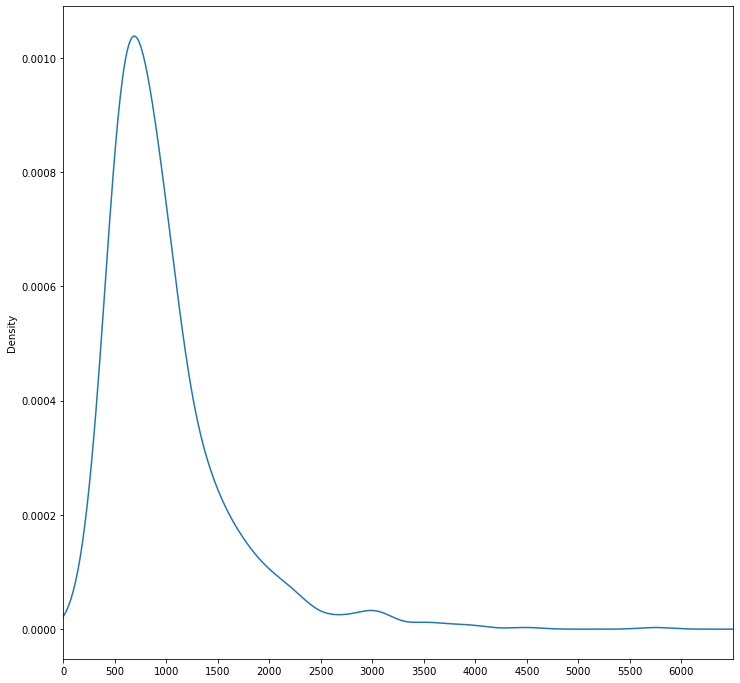

In [38]:
fig = plt.figure(figsize=(12,12))
laptop_data['latest_price'].plot(kind = 'density')
plt.xlim(0,6500)
plt.xticks(np.arange(0,6500,500));

Looking at this we can see most laptops will fall between the $500-1250 range. This is interesting but doesn't tell us a whole lot. Lets dig into the brand prices and see how brands fall within their distribution We do see some VERY high prices which we may want to consider removing from our data. Lets dig into this later.

In [27]:
#Lets look at the average price by brand first and see what we get
laptop_brand_prices = laptop_data[['brand','latest_price']]
laptop_average_brand = laptop_brand_prices.groupby(by = 'brand').agg('mean')
laptop_average_brand.sort_values(by = 'latest_price', ascending = False)

,latest_price
brand,
ALIENWARE,3345.745000
APPLE,1972.202143
lenovo,1507.904667
MSI,1267.157750
MICROSOFT,1266.109000
ASUS,1029.882161
LG,990.470000
acer,938.916259
Lenovo,935.022892


It seems that Alienware by far has the highest price. This makes sense as Alienware is seen as a "high-end" gaming laptop product that would typically have higher specs than your average computer. We see Apple coming behind Alienware which is to be expected as Apple also is known to have more expensive products. Kind of surprisingly, we see Lenovo, MSI, and Microsoft in the top five most expensive laptop brands. This is intersting. Lets look at the distribution of prices by brand.

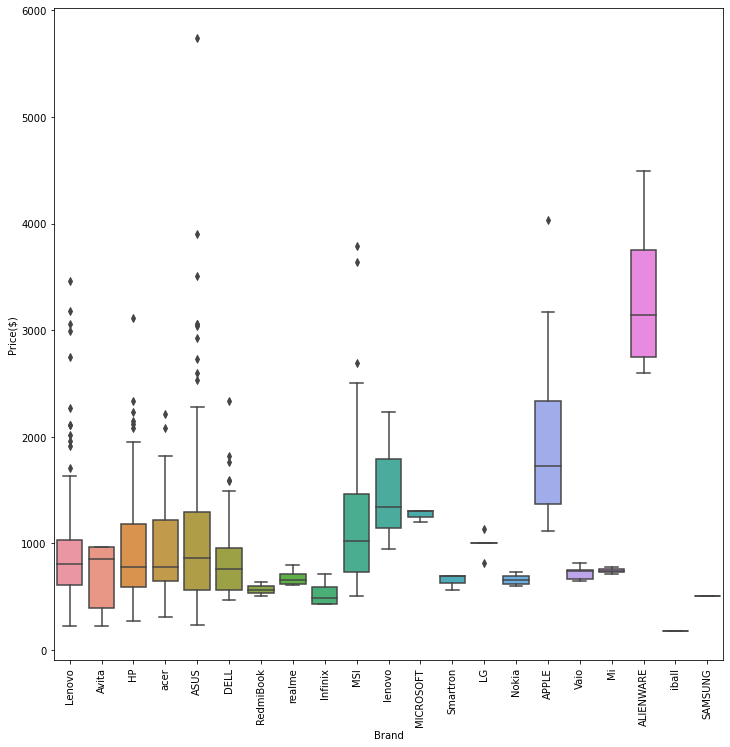

In [28]:
#Create barplot with the branding price that we created earlier. 
#This might give us some insight into how prices are distributed and some outliers to look out for.
plt.subplots(figsize=(12,12))
sns.boxplot(x='brand', y='latest_price', data = laptop_brand_prices)
plt.xticks(rotation = 'vertical')
plt.ylabel('Price($)')
plt.xlabel('Brand');

For the most part, it seems that most laptop prices fall within range of each other. There is one laptop by ASUS which is priced very high and we will investigate this shortly. It seems that Apple is the most consistently priced with other brands showing similar variability across the board. Some brnads have a very narrow band of pricing they operate in which may be a factor of how few laptops they release. The boxplot confirms our suspsicions of Alienware's pricing as it sits above all other brands but has no outliers within the brand itself.

It seems that brand may not provide any super useful insights in our model as most brands seem to be pretty consistent in their pricing range. Lets look at that one outlier from ASUS though.

In [29]:
#There is only one laptop with a price greater than $5,000 so lets look at those specs.
laptop_data[laptop_data['latest_price'] > 5000]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd_gb,hdd_gb,os,os_bit,graphic_card_gb,weight,display_size,warranty,msoffice,latest_price
636,ASUS,Zephyrus,Intel,Core i9,11th,16,DDR4,3072,0,Windows,32,6,Casual,Missing,1,No,5745.87


The Asus Zephyrus is a whoppping $5,745.87! BUt it comes with a Core i9 processor and 3TB of storage.

To know if this is a true outlier we will have to perform some deeper analysis into how these features interact with pricing. We'll keep it for now but it is definitely something to look out for as we move forward.

In [30]:
# Saving the data

datapath = './dataset'
laptop_data.to_csv('./dataset/tim_laptop_cleaned.csv')

# Final Thoughts

There was a lot of initial looks at the data in the notebook. 

We found our main feature of interest which is latest_price. There are numerous features that may be useful however due to the discrete nature of the data, it may be best to look at the problem as clustering/classification of these laptops into sets of different combinations of features as opposed to a regression of singular features.

It will be interesting moving forward through the data. We removed some columns that would not provide much insight such as `touchscreen_display` and the largely missing `display_size` columns. There are other features we are unsure about but without deeper exploration it is too soon to say which of those features are not useful.

We have begun to understand how pricing between brands differ and saw that they are within a very similar range. Some fascinating insights should come out of the further exploration of this data.